# An Analysis of FAANG Stocks during Corona Virus Pandemic ie 2020

### Importing the required libraries for the project

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

The stocks that are considered for this study are:
FANG - Facebook
AMZN - Amazon
AAPL - Apple
NFLX - Netflix
GOOG - Google

### Importing the required data from Yahoo data

In [2]:
# from on the companies will be refered by their tickers
AAPL = data.DataReader("AAPL", 'yahoo', '1/1/2020', '31/12/2020')
FANG = data.DataReader("FANG", 'yahoo', '1/1/2020', '31/12/2020')
NFLX = data.DataReader("NFLX", 'yahoo', '1/1/2020', '31/12/2020')
GOOG = data.DataReader("GOOG", 'yahoo', '1/1/2020', '31/12/2020')
AMZN = data.DataReader("AMZN",'yahoo', '1/1/2020', '31/12/2020')

In [3]:
tickers = ['AAPL','FANG','NFLX','GOOG','AMZN']

In [4]:
# Combining the above data into a single dataset
stock = pd.concat([AAPL,FANG,NFLX,GOOG,AMZN],axis = 1,keys = tickers)

In [5]:
stock.columns.names = ['Tickers','Stock_Info']

In [6]:
# checking the data 
stock.head()

Tickers          AAPL                                                \
Stock_Info       High        Low       Open      Close       Volume   
Date                                                                  
2019-12-31  73.419998  72.379997  72.482498  73.412498  100805600.0   
2020-01-02  75.150002  73.797501  74.059998  75.087502  135480400.0   
2020-01-03  75.144997  74.125000  74.287498  74.357498  146322800.0   
2020-01-06  74.989998  73.187500  73.447502  74.949997  118387200.0   
2020-01-07  75.224998  74.370003  74.959999  74.597504  108872000.0   

Tickers                     FANG                                   ...  \
Stock_Info  Adj Close       High        Low       Open      Close  ...   
Date                                                               ...   
2019-12-31  72.675339  93.120003  90.610001  90.769997  92.860001  ...   
2020-01-02  74.333511  93.660004  91.489998  93.349998  92.650002  ...   
2020-01-03  73.610840  95.750000  93.430000  95.000000  94.410004  ...   
2020-01-06  74.197395  95.910004  93.970001  95.660004  94.900002  ...   
2020-01-07  73.848442  96.540001  94.650002  94.650002  96.419998  ...   

Tickers            GOOG                                            AMZN  \
Stock_Info         Open        Close   Volume    Adj Close         High   
Date                                                                      
2019-12-31  1330.109985  1337.020020   961800  1337.020020  1853.260010   
2020-01-02  1341.550049  1367.369995  1406600  1367.369995  1898.010010   
2020-01-03  1347.859985  1360.660034  1186400  1360.660034  1886.199951   
2020-01-06  1350.000000  1394.209961  1732300  1394.209961  1903.689941   
2020-01-07  1397.939941  1393.339966  1502700  1393.339966  1913.890015   

Tickers                                                             
Stock_Info          Low    Open        Close   Volume    Adj Close  
Date                                                                
2019-12-31  1832.229980  1842.0  1847.839966  2506500  1847.839966  
2020-01-02  1864.150024  1875.0  1898.010010  4029000  1898.010010  
2020-01-03  1864.500000  1864.5  1874.969971  3764400  1874.969971  
2020-01-06  1860.000000  1860.0  1902.880005  4061800  1902.880005  
2020-01-07  1892.040039  1904.5  1906.859985  4044900  1906.859985  

[5 rows x 30 columns]

# Checking the characteristics of the dataset

In [7]:
#finding the max values of all the stocks
stock.xs(key= 'Close',axis=1,level='Stock_Info').max()

Tickers
AAPL     136.690002
FANG      96.419998
NFLX     556.549988
GOOG    1827.989990
AMZN    3531.449951
dtype: float64

In [9]:
#Creating data set made up of returns of the above stocks
returns = pd.DataFrame()

In [10]:
for t in tickers:
    returns[t+'return'] = stock[t]['Close'].pct_change()
print(returns)

            AAPLreturn  FANGreturn  NFLXreturn  GOOGreturn  AMZNreturn
Date                                                                  
2019-12-31         NaN         NaN         NaN         NaN         NaN
2020-01-02    0.022816   -0.002261    0.019285    0.022700    0.027151
2020-01-03   -0.009722    0.018996   -0.011855   -0.004907   -0.012139
2020-01-06    0.007968    0.005190    0.030469    0.024657    0.014886
2020-01-07   -0.004703    0.016017   -0.015127   -0.000624    0.002092
...                ...         ...         ...         ...         ...
2020-12-24    0.007712    0.009414   -0.000991    0.003735   -0.003949
2020-12-28    0.035766   -0.012850    0.010020    0.021416    0.035071
2020-12-29   -0.013315   -0.013227    0.022634   -0.009780    0.011584
2020-12-30   -0.008527    0.048298   -0.011830   -0.010917   -0.010882
2020-12-31   -0.007703   -0.017658    0.030767    0.007105   -0.008801

[254 rows x 5 columns]


In [11]:
#creating visuals to find the nature of the data relations 
import seaborn as sns

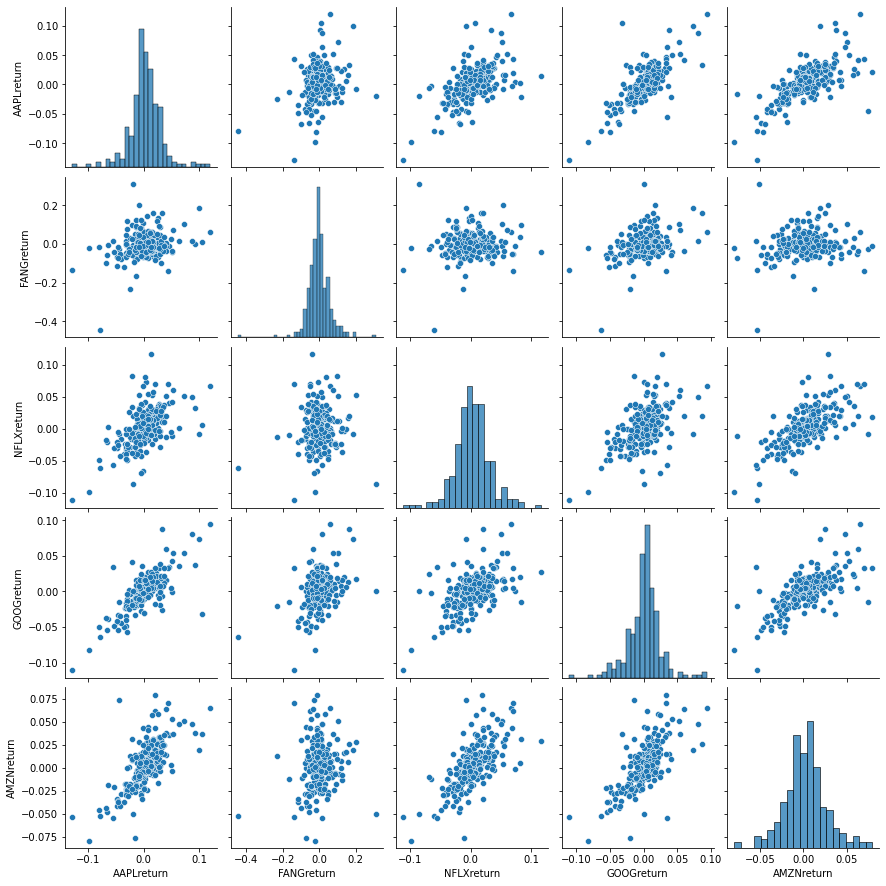

In [12]:
sns.pairplot(data = returns)

In [13]:
# Checking the min returns of stock and date
returns.idxmin()

AAPLreturn   2020-03-16
FANGreturn   2020-03-09
NFLXreturn   2020-03-16
GOOGreturn   2020-03-16
AMZNreturn   2020-03-12
dtype: datetime64[ns]

In [14]:
# Finding the dates of max values
returns.idxmax()

AAPLreturn   2020-03-13
FANGreturn   2020-11-09
NFLXreturn   2020-08-26
GOOGreturn   2020-03-13
AMZNreturn   2020-07-20
dtype: datetime64[ns]

<AxesSubplot:xlabel='Tickers', ylabel='Tickers'>

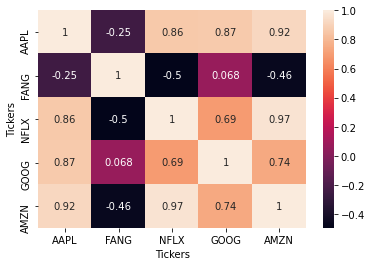

In [16]:
#Checking the correlation between the returns from the stocks
sns.heatmap(stock.xs(key='Close',axis=1,level='Stock_Info').corr(),annot=True)